In [9]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

seed = 7
numpy.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model Large scales
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_20 (Dropout)         (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 16, 16)        36928     
__________

In [10]:

from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')

# Fit the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, callbacks=[earlyStopping])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 38s - loss: 1.8305 - acc: 0.3106 - val_loss: 1.4505 - val_acc: 0.4705
Epoch 2/50
50000/50000 [==============================] - 38s - loss: 1.2723 - acc: 0.5381 - val_loss: 1.0768 - val_acc: 0.6165
Epoch 3/50
50000/50000 [==============================] - 38s - loss: 1.0263 - acc: 0.6335 - val_loss: 0.9091 - val_acc: 0.6827
Epoch 4/50
50000/50000 [==============================] - 39s - loss: 0.8776 - acc: 0.6902 - val_loss: 0.7985 - val_acc: 0.7232
Epoch 5/50
50000/50000 [==============================] - 38s - loss: 0.7777 - acc: 0.7277 - val_loss: 0.7579 - val_acc: 0.7373
Epoch 6/50
50000/50000 [==============================] - 38s - loss: 0.6945 - acc: 0.7564 - val_loss: 0.7213 - val_acc: 0.7544
Epoch 7/50
50000/50000 [==============================] - 38s - loss: 0.6335 - acc: 0.7775 - val_loss: 0.6699 - val_acc: 0.7700
Epoch 8/50
50000/50000 [==============================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


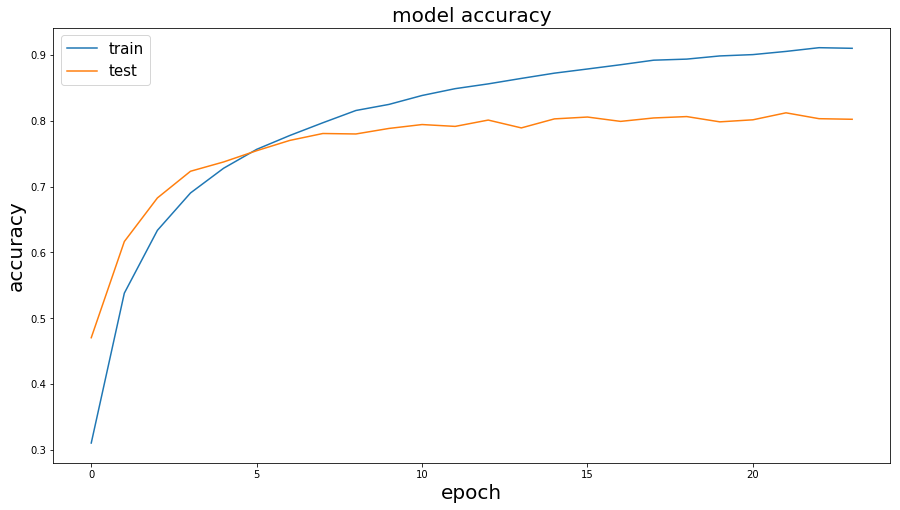

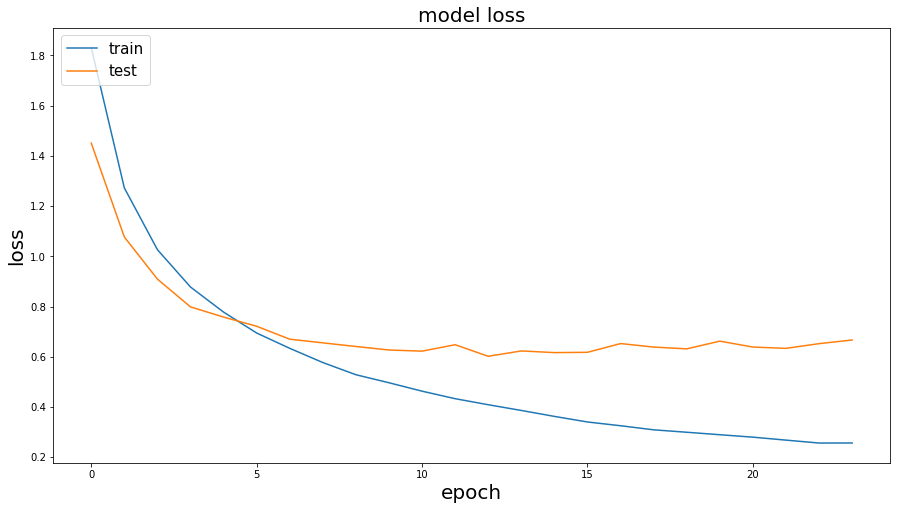

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
print(hist.history.keys())
# summarize history for accuracy
plt.figure(figsize=(15,8))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy', size=20)
plt.ylabel('accuracy', size=20)
plt.xlabel('epoch', size=20)
plt.legend(['train', 'test'], loc='upper left', prop={'size':15})
plt.show()
# summarize history for loss
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss', size=20)
plt.ylabel('loss', size=20)
plt.xlabel('epoch', size=20)
plt.legend(['train', 'test'], loc='upper left', prop={'size':15})
plt.show()


In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("cifar10/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cifar10/model.h5")
print("Saved model to disk")

Saved model to disk


Using TensorFlow backend.


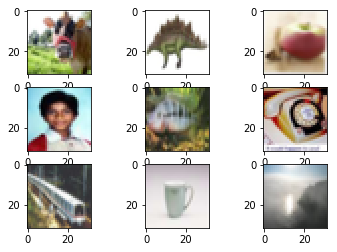

In [1]:
from keras.datasets import cifar100
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow((X_train[i]))
# show the plot
pyplot.show()

In [2]:
# Simple CNN model for CIFAR-100
import numpy as np
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

def normalize(X_train,X_test):
    #this function normalize inputs for zero mean and unit variance
    # it is used when training a model.
    # Input: training set and test set
    # Output: normalized training set and test set according to the trianing set statistics.
    mean = np.mean(X_train,axis=(0,1,2,3))
    std = np.std(X_train, axis=(0, 1, 2, 3))
    print(mean)
    print(std)
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    return X_train, X_test

(X_train, y_train), (X_test, y_test) = cifar100.load_data()
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train, X_test = normalize(X_train, X_test)
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(X_train)

121.936
68.389


In [12]:
from keras.regularizers import l1, l2
from keras.callbacks import EarlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# Create the model
model = Sequential()
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
weight_decay = 0.0005

model.add(Conv2D(64, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation='relu',kernel_regularizer=l2(weight_decay)))
model.add(BatchNormalization())
          
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [77]:
epochs = 150
lrate = 0.1
decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
adam = Adam(lr=0.001)
sgd = SGD(lr=0.1, decay=decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_128 (Conv2D)          (None, 64, 32, 32)        1792      
_________________________________________________________________
batch_normalization_78 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
dropout_69 (Dropout)         (None, 64, 32, 32)        0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 64, 32, 32)        36928     
_________________________________________________________________
batch_normalization_79 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 128, 16, 16)       73856     
__________

In [13]:
#training parameters
batch_size = 128
maxepoches = 250
learning_rate = 0.1
lr_decay = 1e-6
lrf = learning_rate

#optimization details
sgd = SGD(lr=lrf, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 64, 32, 32)        1792      
_________________________________________________________________
batch_normalization_23 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 64, 32, 32)        36928     
_________________________________________________________________
batch_normalization_24 (Batc (None, 64, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 128, 16, 16)       73856     
__________

In [14]:
# training process in a for loop with learning rate drop every 25 epoches.
for epoch in range(1,maxepoches):

    if epoch%25==0 and epoch>0:
        lrf/=2
        sgd = SGD(lr=lrf, decay=lr_decay, momentum=0.9, nesterov=True)
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

    hist = model.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=epoch, verbose=1,
                        validation_data=(X_test, y_test),initial_epoch=epoch-1)

Epoch 1/1
390/390 [==============================] - 135s - loss: 7.0913 - acc: 0.0139 - val_loss: 6.2652 - val_acc: 0.0110
Epoch 2/2
390/390 [==============================] - 135s - loss: 5.7054 - acc: 0.0202 - val_loss: 5.4663 - val_acc: 0.0106
Epoch 3/3
390/390 [==============================] - 134s - loss: 5.0726 - acc: 0.0375 - val_loss: 5.3755 - val_acc: 0.0267
Epoch 4/4
390/390 [==============================] - 137s - loss: 4.6931 - acc: 0.0570 - val_loss: 4.9404 - val_acc: 0.0389
Epoch 5/5
390/390 [==============================] - 137s - loss: 4.5850 - acc: 0.0748 - val_loss: 4.6000 - val_acc: 0.0986
Epoch 6/6
390/390 [==============================] - 137s - loss: 4.4930 - acc: 0.0956 - val_loss: 15.1135 - val_acc: 0.0193
Epoch 7/7
390/390 [==============================] - 137s - loss: 4.8004 - acc: 0.0988 - val_loss: 4.5906 - val_acc: 0.1108
Epoch 8/8
390/390 [==============================] - 137s - loss: 4.6718 - acc: 0.1119 - val_loss: 4.7396 - val_acc: 0.1328
Epoch 9

390/390 [==============================] - 136s - loss: 1.4791 - acc: 0.7636 - val_loss: 1.8834 - val_acc: 0.6922
Epoch 131/131
390/390 [==============================] - 134s - loss: 1.4726 - acc: 0.7649 - val_loss: 1.8704 - val_acc: 0.6935
Epoch 132/132
390/390 [==============================] - 135s - loss: 1.4677 - acc: 0.7647 - val_loss: 1.8981 - val_acc: 0.6886
Epoch 133/133
390/390 [==============================] - 135s - loss: 1.4483 - acc: 0.7679 - val_loss: 1.8748 - val_acc: 0.6907
Epoch 134/134
390/390 [==============================] - 136s - loss: 1.4386 - acc: 0.7709 - val_loss: 1.8585 - val_acc: 0.6916
Epoch 135/135
390/390 [==============================] - 136s - loss: 1.4390 - acc: 0.7684 - val_loss: 1.8771 - val_acc: 0.6919
Epoch 136/136
390/390 [==============================] - 136s - loss: 1.4276 - acc: 0.7711 - val_loss: 1.8924 - val_acc: 0.6854
Epoch 137/137
390/390 [==============================] - 136s - loss: 1.4296 - acc: 0.7690 - val_loss: 1.8565 - val_ac

In [48]:
f = open('cifar10/output.txt', 'r')
hist.history = {}
hist.history['acc'] = []
hist.history['loss'] = []
hist.history['val_acc'] = []
hist.history['val_loss'] = []
lines = f.readlines()
for i in range(0, len(lines)): #
    line = lines[i]
    tmps = line.split(' ')
    if tmps[0][0] == '3':
        print(tmps[6], tmps[9], tmps[12], tmps[15], )
        hist.history['loss'].append(tmps[6])
        hist.history['acc'].append(tmps[9])
        hist.history['val_loss'].append(tmps[12])
        hist.history['val_acc'].append(tmps[15])
f.close()


7.0913 0.0139 6.2652 0.0110

5.7054 0.0202 5.4663 0.0106

5.0726 0.0375 5.3755 0.0267

4.6931 0.0570 4.9404 0.0389

4.5850 0.0748 4.6000 0.0986

4.4930 0.0956 15.1135 0.0193

4.8004 0.0988 4.5906 0.1108

4.6718 0.1119 4.7396 0.1328

4.6060 0.1228 4.4371 0.1448

4.4310 0.1362 4.2704 0.1519

4.3281 0.1453 4.1667 0.1895

4.5760 0.1478 5.1182 0.1750

4.6639 0.1761 4.3872 0.2092

4.2379 0.1966 3.9459 0.2287

3.9648 0.2089 3.7425 0.2475

3.8307 0.2268 3.4774 0.2933

3.7517 0.2404 3.4959 0.2943

3.7007 0.2538 3.4532 0.3102

3.6720 0.2687 3.3422 0.3383

3.6531 0.2821 3.3681 0.3423

3.6452 0.2919 3.4126 0.3448

3.6181 0.3015 3.3851 0.3571

3.6031 0.3142 3.2420 0.3950

3.5993 0.3228 3.3621 0.3762

3.2987 0.3761 2.9763 0.4372

3.1672 0.3871 2.8984 0.4427

3.1205 0.3925 2.8617 0.4529

3.0954 0.4012 2.7978 0.4696

3.0885 0.4041 2.9509 0.4361

3.0739 0.4097 2.7794 0.4777

3.0766 0.4172 2.9258 0.4527

3.0600 0.4234 2.8863 0.4662

3.0713 0.4291 2.8870 0.4719

3.0642 0.4329 2.8678 0.4813

3.0567 0.4381

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy', size=20)
plt.ylabel('accuracy', size=20)
plt.xlabel('epoch', size=20)
plt.legend(['train', 'test'], loc='upper left', prop={'size':15})
plt.savefig('cifar10/100accuracy_70.png')
# summarize history for loss
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss', size=20)
plt.ylabel('loss', size=20)
plt.xlabel('epoch', size=20)
plt.legend(['train', 'test'], loc='upper left', prop={'size':15})
plt.savefig('cifar10/100loss_70.png')

In [16]:
# serialize model to JSON
model_json = model.to_json()
with open("cifar10/100model_70.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("cifar10/100model_70.h5")
print("Saved model to disk")

Saved model to disk
